In [1]:
from bs4 import BeautifulSoup

In [2]:
with open("source.html", encoding="utf-8") as fin:
    soup = BeautifulSoup(fin.read(), "html.parser")

In [3]:
import re

In [4]:
rule = re.compile(r"^lips_\d+_0_shade$")

In [5]:
lip_divs = soup.find_all(id=rule)

In [6]:
len(lip_divs)

2983

In [7]:
lip_divs[1]

<div class="shade_off" id="lips_1823251_0_shade" style="display: none;"><div class="c60" style="background: rgb(34, 62, 65);"></div><div class="tooltip" style="display: none; top: 355.424px; left: 714.091px; position: fixed;"><div class="up_caret"></div><div class="tooltiptext" style="min-width: 200px; max-width: 200px;">Amuse Bouche Lipstick Kale</div></div></div>

In [8]:
l = lip_divs[1]

In [9]:
l.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"}).get("style")

'background: rgb(34, 62, 65);'

In [10]:
for lip in lip_divs:
    child = lip.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"})
#     print(lip.get("id"), child if child is None else child.get("style"))
    if child is None:
        print(lip.get("id"))

In [11]:
lips = {
    div.get("id") : div.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"}).get("style") 
    for div in lip_divs
}

In [12]:
lips = {
    k.lstrip("lips_").rstrip("_shade").rstrip("0").rstrip("_") : eval(v.lstrip("background: rgb").rstrip(";"))
    for k, v in lips.items()
}

In [13]:
lips

{'1928852': (58, 78, 80),
 '1823251': (34, 62, 65),
 '1805639': (24, 66, 67),
 '1914548': (1, 149, 157),
 '1972264': (7, 87, 103),
 '1959642': (10, 99, 125),
 '2068252': (140, 198, 215),
 '1960830': (110, 114, 116),
 '2036457': (19, 70, 87),
 '1688324': (12, 57, 82),
 '2026656': (42, 47, 50),
 '2036440': (32, 82, 98),
 '2028264': (74, 90, 99),
 '1890276': (44, 99, 153),
 '1794460': (64, 91, 114),
 '1899699': (62, 74, 90),
 '1823269': (54, 64, 76),
 '1735570': (134, 189, 234),
 '2042182': (219, 223, 226),
 '2068237': (226, 232, 245),
 '1884931': (108, 114, 128),
 '1853456': (39, 50, 92),
 '2018240': (35, 55, 88),
 '1704980': (69, 71, 88),
 '1933548': (57, 60, 137),
 '1900026': (30, 43, 98),
 '2036465': (28, 43, 121),
 '2144616': (106, 108, 145),
 '2018257': (109, 126, 214),
 '1958776': (201, 202, 227),
 '1914522': (117, 117, 151),
 '1934793': (58, 52, 159),
 '1908706': (41, 24, 174),
 '2026730': (41, 41, 71),
 '1962430': (40, 38, 135),
 '1934785': (57, 51, 96),
 '1914530': (66, 66, 78),

In [14]:
import json

In [15]:
with open("sku2rgb.json", "w", encoding="utf-8") as fout:
    json.dump(lips, fout)

---

dim reduction

In [16]:
import json

In [17]:
with open("sku2rgb.json", "r", encoding="utf-8") as fin:
    lips = json.load(fin)

In [18]:
import sklearn

In [19]:
import numpy as np

In [20]:
from sklearn.manifold import TSNE

In [21]:
sku2i = {
    k : i for i, k in enumerate(lips.keys())
}
i2sku = {
    i : k for k, i in sku2i.items()
}

In [22]:
i2rgb = {
    i : lips[i2sku[i]] for i in range(len(i2sku))
}

In [23]:
data = []
for i, rgb in i2rgb.items():
    data.append(rgb)

In [24]:
X = np.array(data)

In [25]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [26]:
X_embedded

array([[ 21.794209 , -72.17524  ],
       [ 21.0059   , -77.80369  ],
       [ 21.620571 , -77.73235  ],
       ...,
       [ 23.472565 , -78.302246 ],
       [ 26.636358 , -77.005295 ],
       [ 48.028095 ,  -2.8902419]], dtype=float32)

In [27]:
import pickle

In [28]:
data = {
    "sku2i" : sku2i,
    "i2sku" : i2sku,
    "i2rgb" : i2rgb,
    "raw"   : X,
    "reduced" : X_embedded,
}

In [29]:
with open("data.pkl", "wb") as fout:
    pickle.dump(data, fout)

---

vis

In [30]:
def rgbs2strs(rgbs):
    return ["rgb({},{},{})".format(rgb[0], rgb[1], rgb[2]) for rgb in rgbs]

In [31]:
rgbs2strs([(1,2,3)])

['rgb(1,2,3)']

In [63]:
import pickle

In [64]:
import numpy as np

In [65]:
with open("data.pkl", "rb") as fin:
    data = pickle.load(fin)

In [66]:
sku2i, i2sku, i2rgb, raw, reduced = data["sku2i"], data["i2sku"], data["i2rgb"], data["raw"], data["reduced"]

In [107]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [29]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for i in range(len(raw)):
#     point = raw[i]
#     rgb = tuple(c / 255 for c in raw[i])
#     ax.scatter(point[0], point[1], point[2], color=rgb)
# plt.show()

<IPython.core.display.Javascript object>


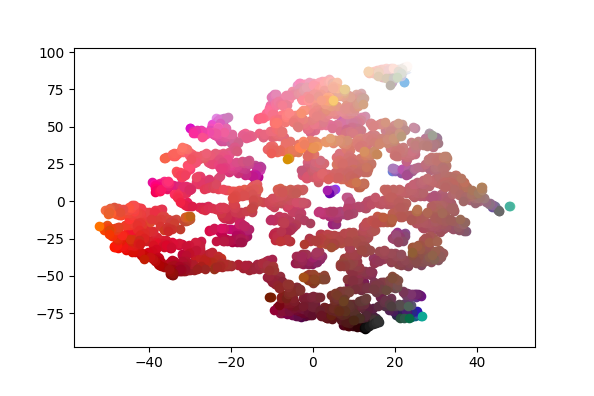

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(reduced)):
    point = reduced[i]
    rgb = tuple(c / 255 for c in raw[i])
    ax.scatter(point[0], point[1], color=rgb)
plt.show()

In [14]:
# from mpl_toolkits.mplot3d import Axes3D


# # What follows is a copy of the 3D plot example code.
# # Data is randomly generated so there is no external data import.

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for i in range(len(raw)):
#     point = raw[i]
#     rgb = tuple(c / 255 for c in raw[i])
#     ax.scatter(point[0], point[1], point[2], color=rgb)
# plt.show()

In [33]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter3d(
    x=raw[:, 0],
    y=raw[:, 1],
    z=raw[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=raw,
        line=dict(
            color="black",
            width=0.2,
        ),
    )
)

iplot([scatter])
# plot([scatter], filename="raw colors.html")


---

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(raw)

In [37]:
kmeans.labels_

array([9, 9, 9, ..., 9, 9, 9])

In [38]:
kmeans.cluster_centers_

array([[148.85941645,  64.88859416,  79.04244032],
       [219.78021978,  78.18681319, 150.0989011 ],
       [216.424821  , 120.22434368, 117.89260143],
       [157.10091743,  31.02752294,  43.66513761],
       [217.72139303,  32.43781095,  34.64676617],
       [234.13333333, 210.66666667, 210.48      ],
       [ 94.51569507,  33.0044843 ,  44.53811659],
       [181.2       ,  94.4625    , 100.74375   ],
       [205.08252427,  37.20873786,  95.0631068 ],
       [ 65.81967213,  73.39344262, 111.3442623 ],
       [225.85818182,  76.55636364,  79.70909091],
       [228.96616541, 149.07518797, 155.28195489]])

In [39]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter3d(
    x=raw[:, 0],
    y=raw[:, 1],
    z=raw[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color="black",
            width=0.2,
        ),
        color=kmeans.labels_
    )
)

iplot([scatter])
# plot([scatter], filename="kmeans++.html")

In [40]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter(
    x=reduced[:, 0],
    y=reduced[:, 1],
    mode='markers',
    marker=dict(
        size=4,
        color=kmeans.labels_
    )
)

iplot([scatter])
# plot([scatter], filename="kmeans++ 2d.html")

---

In [41]:
raw_normalized = raw / 255

In [42]:
raw_normalized.shape

(2983, 3)

In [43]:
u, s, vt = np.linalg.svd(raw_normalized, full_matrices=True)

In [44]:
s

array([50.18009968,  9.28181059,  4.77430225])

In [45]:
vt

array([[-0.81845794, -0.3762202 , -0.43426371],
       [-0.57098743,  0.61680883,  0.54177507],
       [ 0.06403097,  0.69137923, -0.71964908]])

In [46]:
similar =  np.dot(np.dot(u[:, :2], np.diag(s[:2])), vt[:2, :])

In [47]:
similar

array([[0.22743354, 0.30569406, 0.31392149],
       [0.1337689 , 0.24784033, 0.25000658],
       [0.09438098, 0.2616669 , 0.25978546],
       ...,
       [0.02123119, 0.35244914, 0.34049299],
       [0.05226243, 0.63424452, 0.61397966],
       [0.28293095, 0.66193686, 0.66110796]])

In [48]:
raw_normalized

array([[0.22745098, 0.30588235, 0.31372549],
       [0.13333333, 0.24313725, 0.25490196],
       [0.09411765, 0.25882353, 0.2627451 ],
       ...,
       [0.02745098, 0.41960784, 0.27058824],
       [0.05490196, 0.6627451 , 0.58431373],
       [0.28627451, 0.69803922, 0.62352941]])

In [49]:
len(raw), len(u[:, 0])

(2983, 2983)

In [59]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter(
    x=u[:, 0],
    y=u[:, 1],
    mode='markers',
    marker=dict(
        size=4,
        color=rgbs2strs(raw),
        line=dict(
            color="grey",
            width=0.05,
        ),
    )
)

iplot([scatter])

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [57]:
dbscan = DBSCAN(eps=0.001, min_samples=2).fit(u[:, :2])
kmeans = KMeans(n_clusters=12, random_state=0).fit(u[:, :2])

clustering = kmeans

In [58]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter(
    x=u[:, 0],
    y=u[:, 1],
    mode='markers',
    marker=dict(
        size=4,
        color=clustering.labels_
    )
)

iplot([scatter])

In [61]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [81]:
from scipy.spatial import Voronoi

# compute Voronoi tesselation
vor = Voronoi(kmeans.cluster_centers_)


In [82]:
vor.points.shape, vor.ridge_points.shape, len(vor.ridge_vertices), vor.point_region.shape

((12, 2), (28, 2), 28, (12,))

In [86]:
# plot
regions, vertices = voronoi_finite_polygons_2d(vor)

In [88]:
regions, vertices

([[13, 8, 9, 12],
  [16, 3, 7, 5, 15],
  [15, 5, 4, 10],
  [18, 2, 1, 0, 17],
  [12, 9, 11],
  [16, 3, 1, 2, 14],
  [9, 8, 20, 19, 6, 4, 10, 11],
  [7, 5, 4, 6],
  [2, 21, 22, 8, 13, 14],
  [16, 14, 13, 12, 11, 10, 15],
  [24, 0, 23],
  [1, 3, 7, 6, 26, 25, 0]],
 array([[-6.53682739e-03,  4.84335772e-02],
        [-2.00187711e-02,  3.02315083e-02],
        [-1.40544625e+00, -1.78437608e-01],
        [-1.35852125e-02,  1.73672721e-02],
        [-1.36350792e-02,  5.55545082e-04],
        [-1.83217113e-02,  6.30428715e-03],
        [ 3.31549176e-02,  9.92814588e-03],
        [-1.28026767e-02,  1.68586116e-02],
        [ 5.67476693e-02, -3.19436010e-02],
        [ 1.82176829e-02, -2.33385397e-02],
        [-1.62120323e-02, -2.86732461e-03],
        [-1.34704548e-02, -1.05974113e-02],
        [-4.26825878e-02, -2.10071928e-02],
        [-1.82899747e-01, -4.00271732e-02],
        [-5.53627290e-01, -7.51180922e-02],
        [-9.77191220e-02, -7.47929531e-03],
        [-1.55062506e-01, -1.4061

In [118]:
vertices[regions[0]]

array([[-0.18289975, -0.04002717],
       [ 0.05674767, -0.0319436 ],
       [ 0.01821768, -0.02333854],
       [-0.04268259, -0.02100719]])

In [145]:
paths = [
    "M " + " L ".join(("{},{}".format(row[0], row[1]) for row in vertices[r])) + " Z"
    for r in regions
]

# {
#     'type': 'path',
#     'path': ' M 0.3,0.7 L2,8 L2,9 L3,10, L4,10 L5,9 L5,8 L4,7 Z',

#     'fillcolor': 'rgba(255, 140, 184, 0.5)',
#     'line': {
#         'color': 'rgb(255, 140, 184)',
#     },
# },

shapes = [
   {
        "type" : "path",
        "path" : path,
        'fillcolor': 'rgba(0, 0, 0, 0)',
        'line': {
            'color': 'rgb(0, 0, 0)',
            'width': 0.2,
        },
   }
    for path in paths
]

In [149]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

dummy = go.Scatter(x=[0], y=[0], mode="markers", marker={"color": "white"})

data = [
#     dummy,
    go.Scatter(
        x=u[:, 0],
        y=u[:, 1],
        mode='markers',
        marker=dict(
            size=4,
            color=rgbs2strs(raw),
        )
    ),
]

layout = {
    'shapes': shapes
}
fig = {
    'data' : data,
    'layout': layout,
}

# iplot(fig, filename='shapes-path')

plot(fig, filename="kmeans++ SVG boundary.html")

'file://C:\\Users\\zhenl\\Documents\\Courses\\4300 Language and Information\\DesktopAssembler\\color\\kmeans++ SVG boundary.html'